In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from datetime import datetime, timedelta

df = pd.read_csv('data/20_secs_1443.csv', header=None)
df.columns = ['timeStamp',
              'xa','ya','za',
              'xg','yg','zg',
              'xc','yc','zc', 'empty',
              'mSensorTimeStamp','mLocationLat','mLocationLong',
              'mAcc_0','mAcc_1','mAcc_2',
              'mGyr_0','mGyr_1','mGyr_2',
              'mCom_0','mCom_1','mCom_2',
              'mLocationSpeed','roadTypeInt','roadQualityInt']

# Convert the timeStamp column to Python datetime objects
df['timeStamp'] = pd.to_datetime(df['timeStamp'], unit='ms') + timedelta(hours=2)
#df['mSensorTimeStamp'] = pd.to_datetime(df['mSensorTimeStamp'], unit='ms')

# Calculate the total elapsed time in seconds
total_time = (df['timeStamp'].iloc[-1] - df['timeStamp'].iloc[0]).total_seconds()

# Print the total elapsed time in seconds
print("Total elapsed time: {:.2f} seconds".format(total_time))
print(df['timeStamp'])


Total elapsed time: 24.85 seconds
0      2023-05-02 14:42:51.977
1      2023-05-02 14:42:52.044
2      2023-05-02 14:42:52.060
3      2023-05-02 14:42:52.072
4      2023-05-02 14:42:52.085
                 ...          
2652   2023-05-02 14:43:16.788
2653   2023-05-02 14:43:16.797
2654   2023-05-02 14:43:16.806
2655   2023-05-02 14:43:16.815
2656   2023-05-02 14:43:16.824
Name: timeStamp, Length: 2657, dtype: datetime64[ns]


In [3]:
print(df['mSensorTimeStamp']) #what is this?

0       15510146553055
1       15510146553055
2       15510146553055
3       15510146553055
4       15510146553055
             ...      
2652    15510146553055
2653    15510146553055
2654    15510146553055
2655    15510146553055
2656    15510146553055
Name: mSensorTimeStamp, Length: 2657, dtype: int64


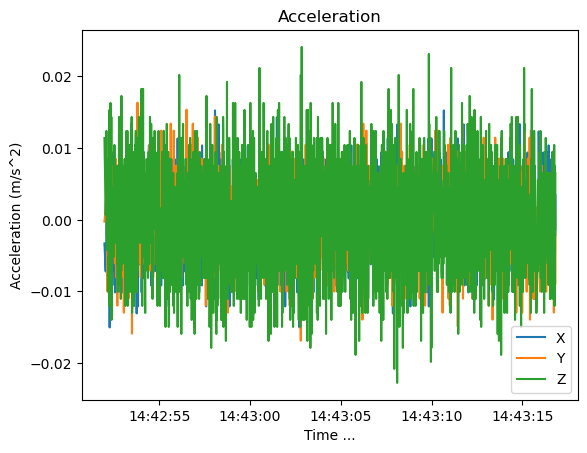

In [4]:
# Remove DC offset
acc_x = df['xa'] - np.mean(df['xa'])
acc_y = df['ya'] - np.mean(df['ya'])
acc_z = df['za'] - np.mean(df['za'])
time = df['timeStamp']

plt.plot(time, acc_x, label='X')
plt.plot(time, acc_y, label='Y')
plt.plot(time, acc_z, label='Z')

plt.xlabel('Time ...')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Acceleration')
plt.legend()
plt.show()